BERT, which stands for Bidirectional Encoder Representations from Transformers, is a natural language processing (NLP) model introduced by researchers at Google in 2018. It represents a significant advancement in the field of deep learning for language understanding. BERT is based on the Transformer architecture, which was introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017.

Here are some key features and concepts related to BERT:

Bidirectional Context: Unlike traditional language models that read text in a left-to-right or right-to-left manner, BERT reads text bidirectionally. It considers the context from both the left and the right of a word in all layers of the model.

Transformer Architecture: BERT is built upon the Transformer architecture, which relies on self-attention mechanisms to weigh the significance of different words in a sentence concerning each other. This allows BERT to capture long-range dependencies in language.

Pre-training and Fine-tuning: BERT is pre-trained on large amounts of unlabeled text data. During pre-training, the model learns to predict missing words in a sentence (Masked Language Model, MLM) and understand the relationship between two sentences (Next Sentence Prediction, NSP). After pre-training, the model can be fine-tuned on specific NLP tasks, such as text classification, named entity recognition, and question-answering.

Contextualized Word Representations: BERT generates contextualized word representations, meaning the meaning of a word can vary depending on its context within a sentence. This allows BERT to capture nuances and polysemy in language.

State-of-the-Art Performance: BERT achieved state-of-the-art results on various NLP benchmarks and tasks when it was introduced. Its ability to capture context and semantics from large amounts of data has made it a popular choice for a wide range of NLP applications.

BERT has been a foundational model in the development of more advanced language models, and its pre-trained representations are often used as a starting point for fine-tuning on specific tasks. It has had a significant impact on the field of natural language processing and continues to be influential in research and industry applications.






In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [8]:
from keras.preprocessing import text
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer


In [10]:
import torch
from torch.utils.data import Dataset


transformer A transformer model is a neural network that learns context 
and thus meaning by tracking relationships in sequential data like the words in this sentence.
Transformer models apply an evolving set of mathematical techniques, called attention or self-attention, 
to detect subtle ways even distant data elements in a series influence and depend on each other.'''

In [11]:
# pip install tokenizers==0.13.0

In [12]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from transformers import DistilBertTokenizerFast
from transformers import BertForSequenceClassification, BertTokenizerFast
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig
from transformers import TrainingArguments, Trainer

In [13]:
def load_json_file(filename):
    with open(filename) as f:
        file=json.load(f)
    return file   
filename="intents.json"
intents=load_json_file(filename)
print(intents)

{'intents': [{'tag': 'greeting', 'patterns': ['Hi', 'How are you?', 'Is anyone there?', 'Hello', 'Good day', "What's up", 'how are ya', 'heyy', 'whatsup', '??? ??? ??'], 'responses': ['Hello!', 'Good to see you again!', 'Hi there, how can I help?'], 'context_set': ''}, {'tag': 'goodbye', 'patterns': ['cya', 'see you', 'bye bye', 'See you later', 'Goodbye', 'I am Leaving', 'Bye', 'Have a Good day', 'talk to you later', 'ttyl', 'i got to go', 'gtg'], 'responses': ['Sad to see you go :(', 'Talk to you later', 'Goodbye!', 'Come back soon'], 'context_set': ''}, {'tag': 'creator', 'patterns': ['what is the name of your developers', 'what is the name of your creators', 'what is the name of the developers', 'what is the name of the creators', 'who created you', 'your developers', 'your creators', 'who are your developers', 'developers', 'you are made by', 'you are made by whom', 'who created you', 'who create you', 'creators', 'who made you', 'who designed you'], 'responses': ['Vishwa Bhadoria

In [14]:
def create_df():
    df=pd.DataFrame({'Pattern':[],'Tag':[]})
    return df
    
df=create_df()
df

,Pattern,Tag


In [15]:
def extract_json_info(json_file,df):
    for intent in json_file['intents']:
        for pattern in intent['patterns']:
            sentence_tag=[pattern,intent['tag']]
            df.loc[len(df.index)] = sentence_tag
    return df        
df=extract_json_info(intents,df)
df

,Pattern,Tag
0,Hi,greeting
1,How are you?,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting
...,...,...
405,who is the hod,hod
406,university name,name
407,name of your college,name
408,college name,name


In [16]:
df2=df.copy()
df2

,Pattern,Tag
0,Hi,greeting
1,How are you?,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting
...,...,...
405,who is the hod,hod
406,university name,name
407,name of your college,name
408,college name,name


In [17]:
df.shape

(410, 2)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 0 to 409
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pattern  410 non-null    object
 1   Tag      410 non-null    object
dtypes: object(2)
memory usage: 9.6+ KB


In [19]:
x=len(df['Tag'].unique())
print(f"{x} classes in Chatbot")

print(df['Tag'].unique())

38 classes in Chatbot
['greeting' 'goodbye' 'creator' 'name' 'hours' 'number' 'course' 'fees'
 'location' 'hostel' 'event' 'document' 'floors' 'syllabus' 'library'
 'infrastructure' 'canteen' 'menu' 'placement' 'ithod' 'computerhod'
 'EChod' 'director' 'sem' 'admission' 'scholarship' 'facilities'
 'college intake' 'uniform' 'committee' 'random' 'swear' 'vacation'
 'sports' 'salutaion' 'task' 'ragging' 'hod']


In [20]:
df.isna().sum()

Pattern    0
Tag        0
dtype: int64

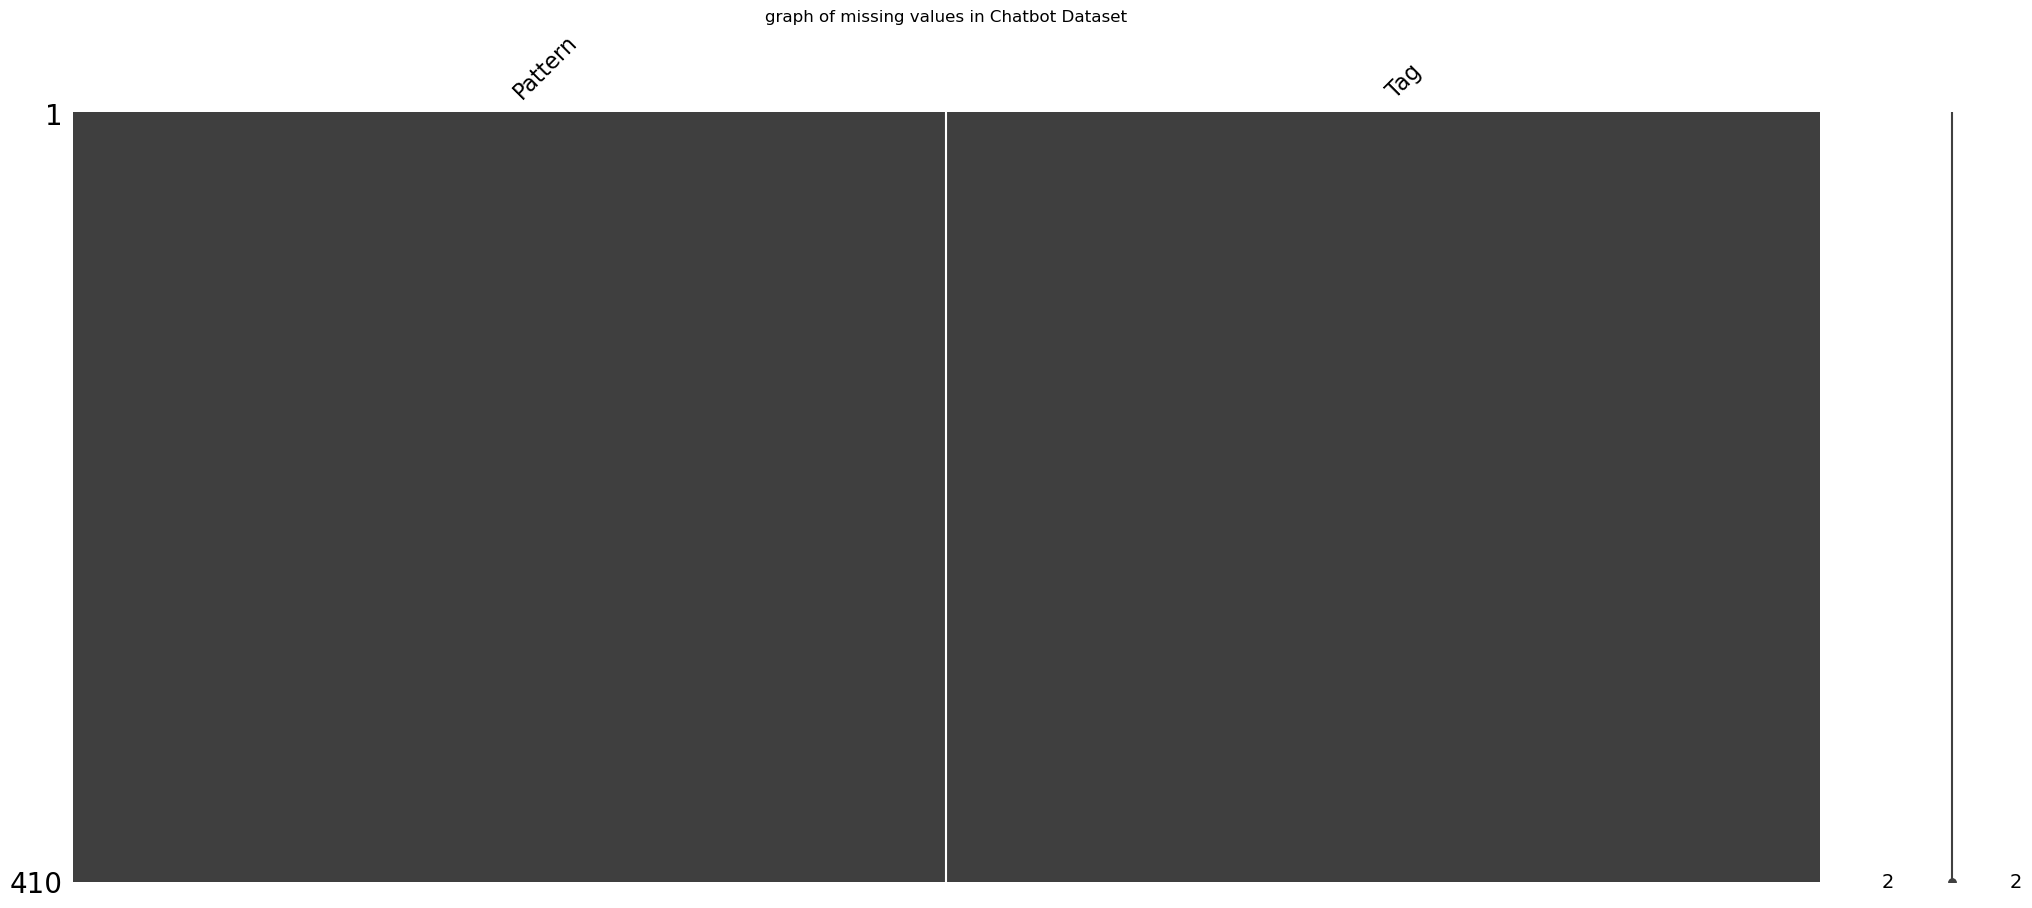

In [21]:
msno.matrix(df)
plt.title('graph of missing values in Chatbot Dataset')
plt.show()

In [22]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
#         ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
#                 ha='center', va='bottom') # set the alignment of the text

    plt.show()

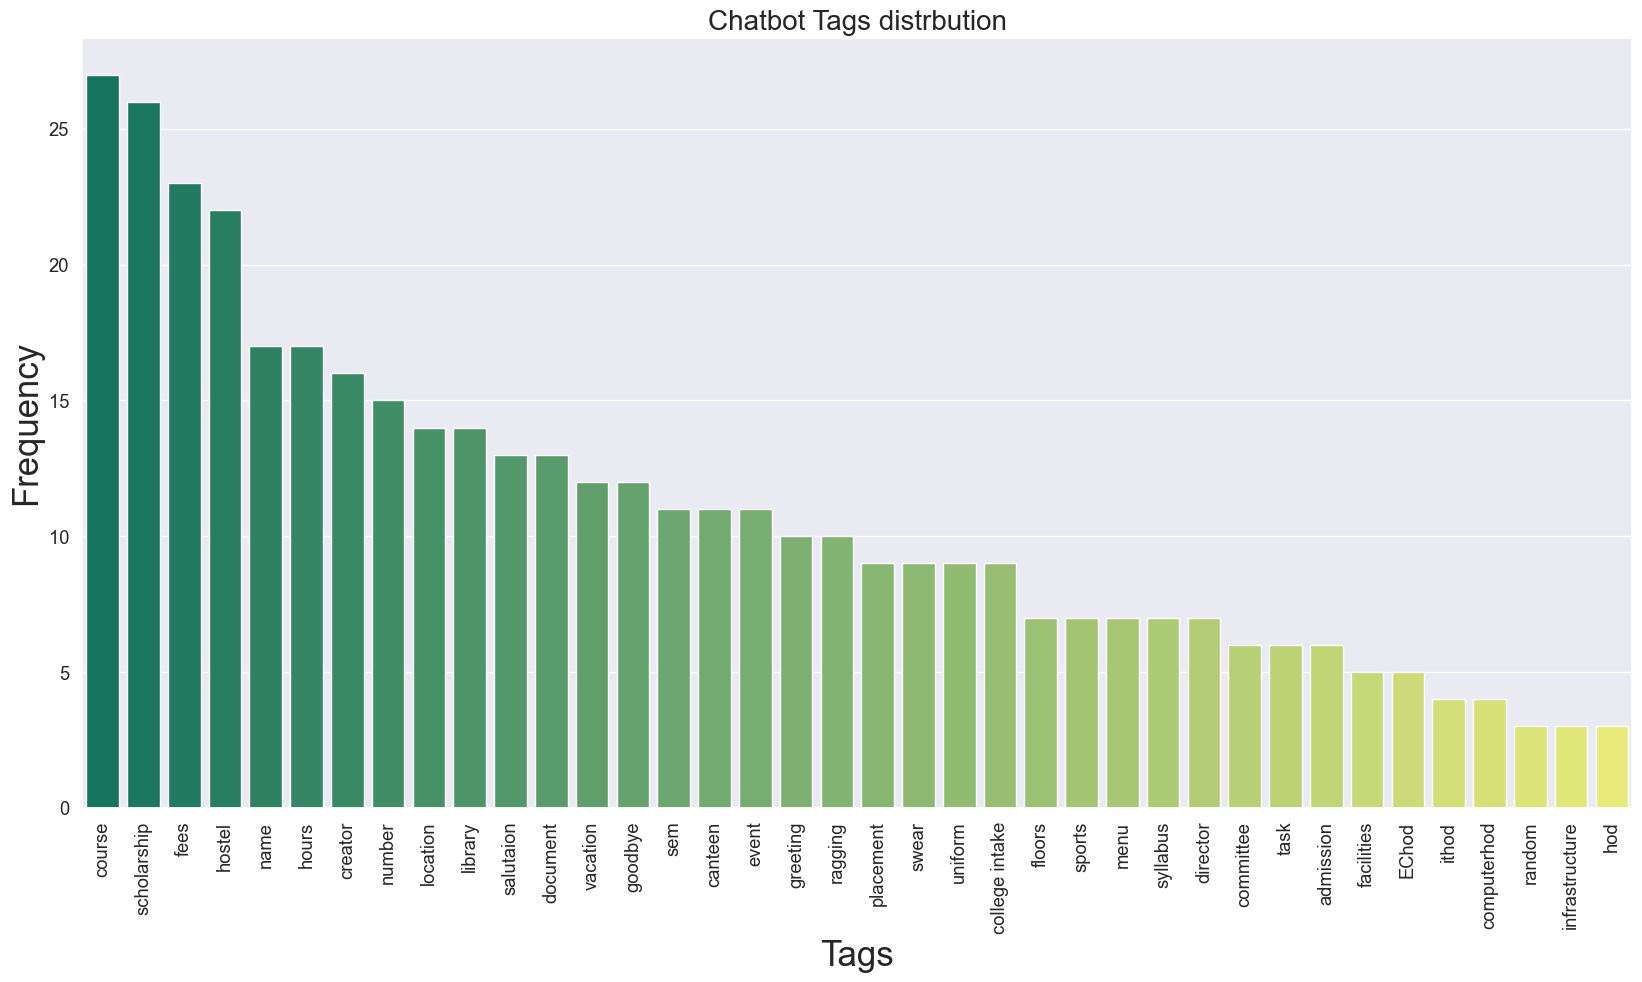

In [23]:
sns.set(font_scale = 1.2)
order = df['Tag'].value_counts().index
count_plot(df['Tag'], df, "Chatbot Tags distrbution", "Tags", "Frequency", 20,10, order=order,rotation=True, palette="summer")

In [24]:
# stemmer = PorterStemmer()
# ignore_words=['?', '!', ',', '.']

# def preprocess_pattern(pattern):
#     words = word_tokenize(pattern.lower())
#     stemmed_words = [stemmer.stem(word) for word in words if word not in ignore_words]
#     return " ".join(stemmed_words)  

# df['Pattern'] = df['Pattern'].apply(preprocess_pattern)
# df.head()

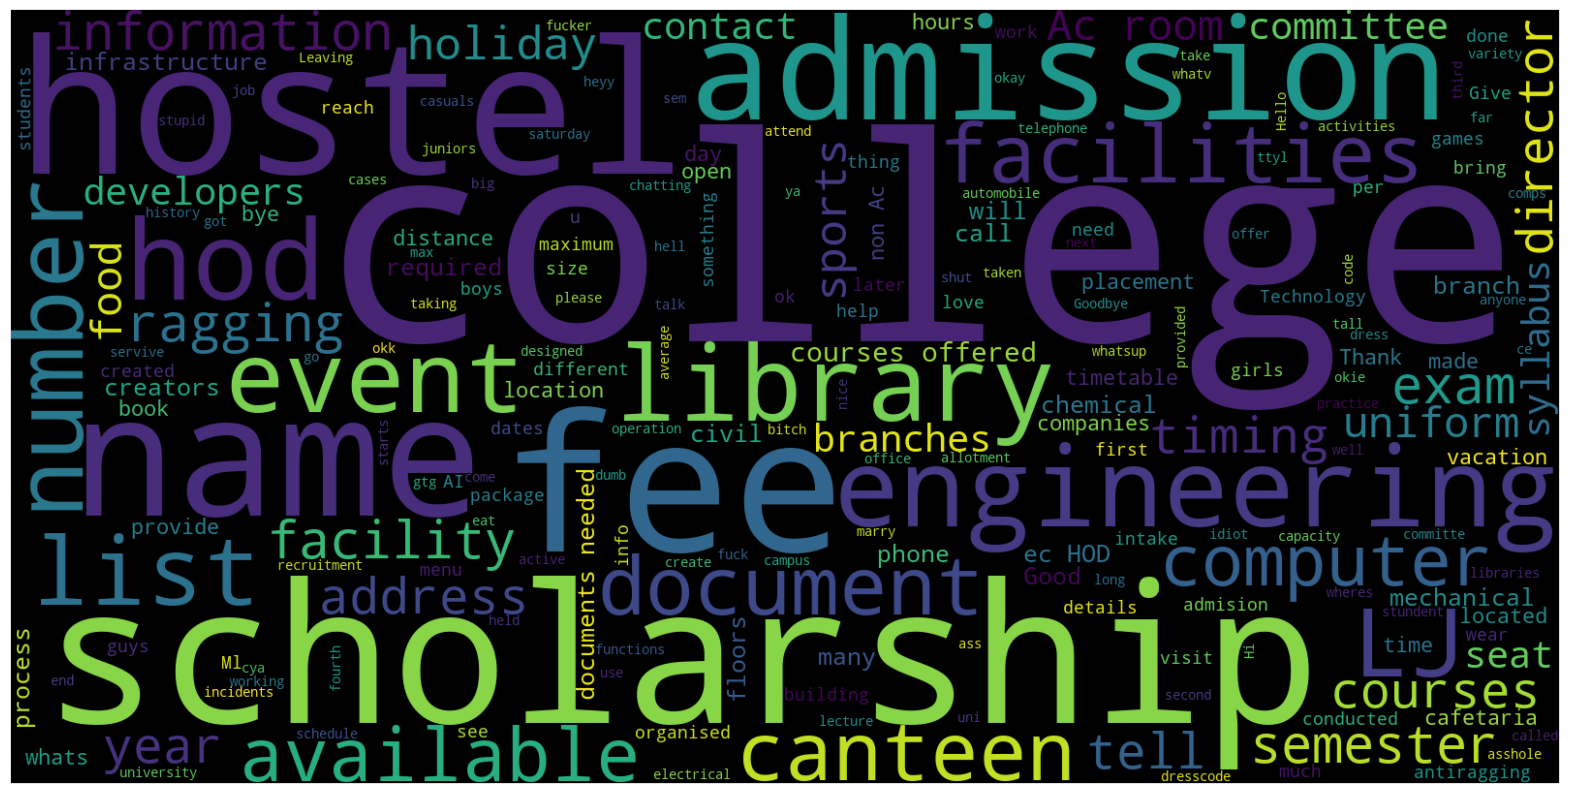

In [25]:
plt.figure(figsize=(20, 20)) 
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df['Pattern']))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

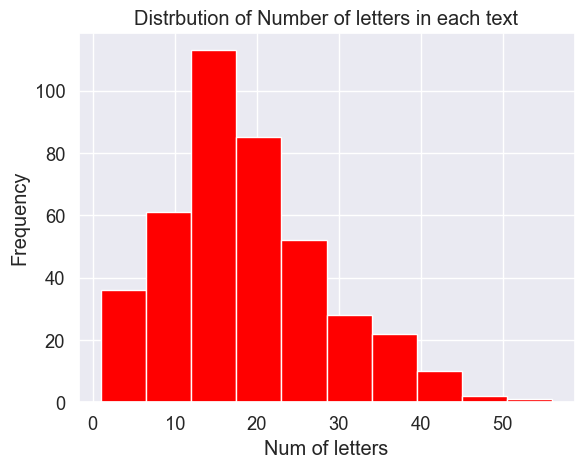

In [26]:
letters_len=df['Pattern'].str.len()
plt.hist(letters_len,color='red')
plt.title("Distrbution of Number of letters in each text")
plt.xlabel("Num of letters")
plt.ylabel("Frequency")
plt.show()

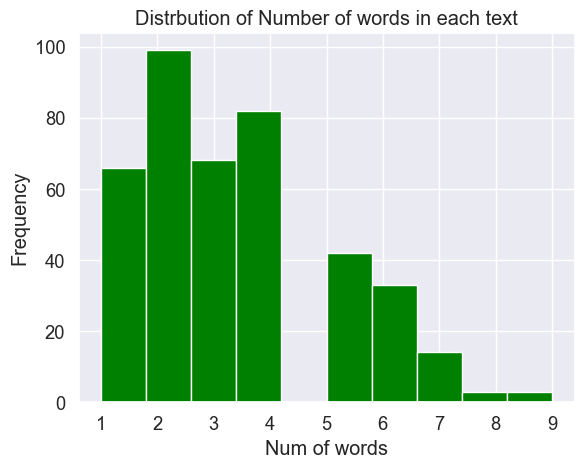

In [27]:
words_len=df['Pattern'].str.split().map(lambda x: len(x))
plt.hist(words_len,color='green')
plt.title("Distrbution of Number of words in each text")
plt.xlabel("Num of words")
plt.ylabel("Frequency")
plt.show()

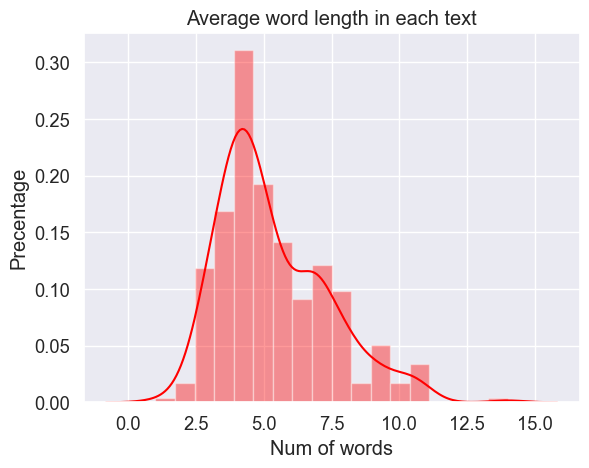

In [28]:
word=df['Pattern'].str.split().apply(lambda x : [len(i) for i in x])
word = word.map(lambda x: np.mean(x))
sns.distplot(word,color='red')
plt.title("Average word length in each text")
plt.xlabel("Num of words")
plt.ylabel("Precentage")
plt.show()

In [29]:
def get_corpus(series):
    words = []
    for text in series:
        for word in text.split():
            words.append(word.strip())
    return words

corpus = get_corpus(df.Pattern)
corpus[:5]
# print(corpus)

['Hi', 'How', 'are', 'you?', 'Is']

In [30]:
print(f"dataset contains {len(corpus)} words")

dataset contains 1353 words


In [31]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
print(most_common)
most_common = dict(most_common)
most_common

[('is', 71), ('college', 68), ('the', 46), ('what', 43), ('of', 35), ('you', 33), ('in', 29), ('for', 26), ('scholarship', 25), ('hostel', 24)]


{'is': 71,
 'college': 68,
 'the': 46,
 'what': 43,
 'of': 35,
 'you': 33,
 'in': 29,
 'for': 26,
 'scholarship': 25,
 'hostel': 24}

In [32]:
def get_top_text_ngrams(corpus, n,g):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

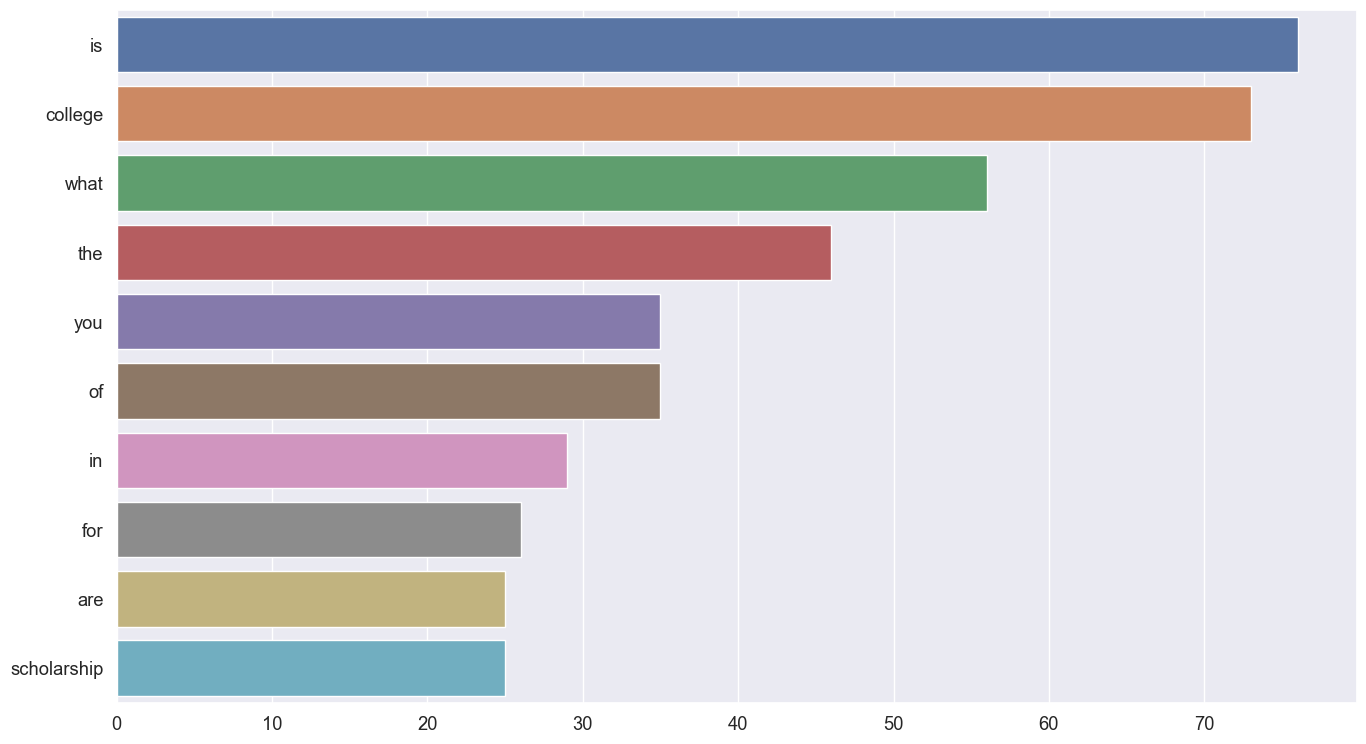

In [33]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.Pattern,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()));


In [34]:
df2.head()

,Pattern,Tag
0,Hi,greeting
1,How are you?,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting


In [35]:
labels=df2['Tag'].unique().tolist()
labels=[s.strip() for s in labels]
labels

['greeting',
 'goodbye',
 'creator',
 'name',
 'hours',
 'number',
 'course',
 'fees',
 'location',
 'hostel',
 'event',
 'document',
 'floors',
 'syllabus',
 'library',
 'infrastructure',
 'canteen',
 'menu',
 'placement',
 'ithod',
 'computerhod',
 'EChod',
 'director',
 'sem',
 'admission',
 'scholarship',
 'facilities',
 'college intake',
 'uniform',
 'committee',
 'random',
 'swear',
 'vacation',
 'sports',
 'salutaion',
 'task',
 'ragging',
 'hod']

In [36]:
id2label={id:label for id,label in enumerate(labels)}
label2id={label:id for id,label in enumerate(labels)}
num_labels=len(labels)

In [37]:
id2label

{0: 'greeting',
 1: 'goodbye',
 2: 'creator',
 3: 'name',
 4: 'hours',
 5: 'number',
 6: 'course',
 7: 'fees',
 8: 'location',
 9: 'hostel',
 10: 'event',
 11: 'document',
 12: 'floors',
 13: 'syllabus',
 14: 'library',
 15: 'infrastructure',
 16: 'canteen',
 17: 'menu',
 18: 'placement',
 19: 'ithod',
 20: 'computerhod',
 21: 'EChod',
 22: 'director',
 23: 'sem',
 24: 'admission',
 25: 'scholarship',
 26: 'facilities',
 27: 'college intake',
 28: 'uniform',
 29: 'committee',
 30: 'random',
 31: 'swear',
 32: 'vacation',
 33: 'sports',
 34: 'salutaion',
 35: 'task',
 36: 'ragging',
 37: 'hod'}

In [38]:
label2id


{'greeting': 0,
 'goodbye': 1,
 'creator': 2,
 'name': 3,
 'hours': 4,
 'number': 5,
 'course': 6,
 'fees': 7,
 'location': 8,
 'hostel': 9,
 'event': 10,
 'document': 11,
 'floors': 12,
 'syllabus': 13,
 'library': 14,
 'infrastructure': 15,
 'canteen': 16,
 'menu': 17,
 'placement': 18,
 'ithod': 19,
 'computerhod': 20,
 'EChod': 21,
 'director': 22,
 'sem': 23,
 'admission': 24,
 'scholarship': 25,
 'facilities': 26,
 'college intake': 27,
 'uniform': 28,
 'committee': 29,
 'random': 30,
 'swear': 31,
 'vacation': 32,
 'sports': 33,
 'salutaion': 34,
 'task': 35,
 'ragging': 36,
 'hod': 37}

In [39]:
df2['labels'] = df2['Tag'].map(lambda x: label2id[x.strip()])
df2.head()

,Pattern,Tag,labels
0,Hi,greeting,0
1,How are you?,greeting,0
2,Is anyone there?,greeting,0
3,Hello,greeting,0
4,Good day,greeting,0


In [40]:
X=list(df2['Pattern'])
X

['Hi',
 'How are you?',
 'Is anyone there?',
 'Hello',
 'Good day',
 "What's up",
 'how are ya',
 'heyy',
 'whatsup',
 '??? ??? ??',
 'cya',
 'see you',
 'bye bye',
 'See you later',
 'Goodbye',
 'I am Leaving',
 'Bye',
 'Have a Good day',
 'talk to you later',
 'ttyl',
 'i got to go',
 'gtg',
 'what is the name of your developers',
 'what is the name of your creators',
 'what is the name of the developers',
 'what is the name of the creators',
 'who created you',
 'your developers',
 'your creators',
 'who are your developers',
 'developers',
 'you are made by',
 'you are made by whom',
 'who created you',
 'who create you',
 'creators',
 'who made you',
 'who designed you',
 'name',
 'your name',
 'do you have a name',
 'what are you called',
 'what is your name',
 'what should I call you',
 'whats your name?',
 'what are you',
 'who are you',
 'who is this',
 'what am i chatting to',
 'who am i taking to',
 'what are you',
 'timing of college',
 'what is college timing',
 'working d

In [41]:
y=list(df2['labels'])
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100)

Yes, tokenizing the data is a crucial step in natural language processing (NLP) tasks, especially when working with models like BERT. Tokenization is the process of breaking down a sequence of text into smaller units, typically words or subwords (subword tokenization). Here are some reasons why tokenization is important:

Input Representation for Models:

Models like BERT operate on fixed-size sequences of tokens. Tokenization is necessary to convert variable-length text sequences into a format that can be fed into these models.
Uniform Input Length:

Tokenization allows you to ensure that all input sequences have a uniform length, which is necessary for batch processing in neural networks. Padding is often applied to shorter sequences to achieve this uniformity.
Vocabulary Mapping:

Tokenization involves mapping words to numerical indices or embeddings. This mapping is crucial for the model to understand and process the input text. Each unique word or subword is typically assigned a unique token ID.
Handling Out-of-Vocabulary Words:

Tokenization enables handling of out-of-vocabulary words. Words that were not present in the training vocabulary can be split into subwords or represented using special tokens, allowing the model to process them.
Efficient Computation:

Tokenization helps in efficient computation. Instead of dealing with entire words, which might result in a very large vocabulary, models work with smaller units (tokens), making computations more tractable.
Attention Mechanism:

Tokenization is closely tied to the attention mechanism in models like BERT. Attention mechanisms allow the model to focus on different parts of the input sequence, and tokenization plays a role in determining which tokens are attended to.

In [43]:
model_name="bert-base-uncased"
max_len=256
tokenizer=BertTokenizer.from_pretrained(model_name,max_length=max_len)
model=BertForSequenceClassification.from_pretrained(model_name,num_labels=num_labels,id2label=id2label,label2id=label2id)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
train_encoding=tokenizer(X_train,truncation=True,padding=True)
test_encoding=tokenizer(X_test,truncation=True,padding=True)

In [45]:
full_data = tokenizer(X, truncation=True, padding=True)

 __getitem__ Method:

def __getitem__(self, idx):: This method is used to retrieve an item from the dataset at a given index idx.
item: It's a dictionary that contains tensor representations of the input encodings ('input_ids', 'attention_mask', etc.) and the corresponding label.
The input encodings are converted to PyTorch tensors using torch.tensor(val[idx]) for each key-value pair in self.encodings.items().
The label is also converted to a PyTorch tensor.

In [46]:
class DataLoader(Dataset):
    
    def __init__(self, encodings, labels):
        
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
               
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):

        return len(self.labels)

In [47]:
train_dataloader = DataLoader(train_encoding, y_train)
test_dataloader = DataLoader(test_encoding, y_test)

In [48]:
fullDataLoader = DataLoader(full_data, y_test)

# Define Evaluation Metrcies

In [49]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids  # True labels
    preds = pred.predictions.argmax(-1)  # Predicted labels (argmax along the last axis)

    # Using precision_recall_fscore_support to compute precision, recall, F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    # Using accuracy_score to compute accuracy
    acc = accuracy_score(labels, preds)
    
    # Returning a dictionary containing the computed metrics
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }


# Define Training Arguments

In [50]:
training_args = TrainingArguments(
    output_dir='./output', 
    do_train=True,
    do_eval=True,
    num_train_epochs=100,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=16,
    warmup_steps=100,                
    weight_decay=0.05,
    logging_strategy='steps',
    logging_dir='./multi-class-logs',            
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps", 
    load_best_model_at_end=True
)

In [51]:
trainer = Trainer(
    model=model,
    args=training_args,                 
    train_dataset=train_dataloader,         
    eval_dataset=test_dataloader,            
    compute_metrics= compute_metrics
)

In [1]:
import wandb
# Initialize WandB
wandb.init(project="uni_chatbot", name="miraculous")


wandb: Currently logged in as: vishwabhadoria2004 (bemiracle). Use `wandb login --relogin` to force relogin


In [53]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,3.553100,3.474584,0.029126,0.003824,0.002067,0.027778
100,2.817200,2.440124,0.543689,0.423780,0.427918,0.480408
150,1.287100,1.231348,0.796117,0.727950,0.740410,0.754101
200,0.378600,0.662611,0.854369,0.801142,0.817725,0.819841
250,0.109900,0.535449,0.893204,0.875929,0.883333,0.895646
300,0.048100,0.517819,0.893204,0.875929,0.883333,0.895646
350,0.028900,0.504982,0.902913,0.907561,0.919048,0.924218
400,0.021400,0.527929,0.893204,0.875475,0.882381,0.895646
450,0.017200,0.524490,0.902913,0.907561,0.919048,0.924218
500,0.014400,0.527067,0.902913,0.907561,0.919048,0.924218


TrainOutput(global_step=1000, training_loss=0.4182534243762493, metrics={'train_runtime': 1211.411, 'train_samples_per_second': 25.342, 'train_steps_per_second': 0.825, 'total_flos': 220940789143200.0, 'train_loss': 0.4182534243762493, 'epoch': 100.0})

In [54]:
q=[trainer.evaluate(eval_dataset=df2) for df2 in [train_dataloader, test_dataloader]]
pd.DataFrame(q, index=["train","test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.009527,1.000000,1.000000,1.000000,1.000000
test,0.527067,0.902913,0.907561,0.919048,0.924218


In [55]:
def predict(text):
    # Assuming there's a tokenizer and a model object defined somewhere in your code.
    # Make sure to import necessary libraries and instantiate the tokenizer and model.

    # Tokenize the input text and convert it to PyTorch tensors
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")

    # Pass the input tensors through the model
    outputs = model(**inputs)

    # Softmax the output to get probabilities
    probs = outputs[0].softmax(1)

    # Get the predicted label index
    pred_label_idx = probs.argmax()

    # Convert the predicted label index to the actual label using model configuration
    pred_label = model.config.id2label[pred_label_idx.item()]

    return probs, pred_label_idx, pred_label


In [56]:
text = "Hello"
predict(text)

(tensor([[9.8675e-01, 7.9498e-04, 5.2063e-05, 8.1921e-05, 5.8254e-04, 2.9029e-04,
          1.0636e-04, 8.4108e-05, 6.2637e-04, 3.7967e-05, 7.9991e-04, 1.0223e-04,
          1.2614e-04, 1.8198e-04, 3.1589e-04, 9.0186e-05, 2.3238e-04, 5.1664e-04,
          6.0727e-04, 5.4821e-04, 1.3087e-04, 1.6654e-04, 2.8905e-04, 1.5480e-04,
          3.0578e-04, 4.2370e-04, 4.5739e-04, 3.4922e-04, 3.2239e-04, 3.1831e-04,
          7.2996e-04, 5.3552e-04, 2.3797e-04, 6.3262e-04, 1.0971e-03, 2.1424e-04,
          2.3542e-04, 4.7512e-04]], device='cuda:0', grad_fn=<SoftmaxBackward0>),
 tensor(0, device='cuda:0'),
 'greeting')

In [57]:
# pip install torchvision

In [58]:
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [59]:

print(torch.cuda.is_available())


True


In [60]:
print(torch.version.cuda)

11.8


In [61]:
model_path = "chatbot"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('chatbot\\tokenizer_config.json',
 'chatbot\\special_tokens_map.json',
 'chatbot\\vocab.txt',
 'chatbot\\added_tokens.json')

In [62]:
# pip install xformers

In [63]:
# model_path = "./chatbot"


model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer= BertTokenizerFast.from_pretrained(model_path)
chatbot= pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [64]:
chatbot("Hello")

[{'label': 'greeting', 'score': 0.9867466688156128}]

In [67]:
def chat(chatbot):
    
    print("CHATBOT: Hi! I am your virtual assistance,Feel free to ask, and I'll do my best to provide you with answers and assistance..")
    print("Type 'quit' to exit the chat\n\n")
    
    text = input("User: ").strip().lower()
    
    while(text != 'quit'):

        score = chatbot(text)[0]['score']
        
        if score < 0.8:
            print("Chatbot: Sorry I can't answer that\n\n")
            text = input("User: ").strip().lower()
            continue
        
        label = label2id[chatbot(text)[0]['label']]
        response = random.choice(intents['intents'][label]['responses'])
        
        print(f"CHATBOT: {response}\n\n")
            
        text = input("YOU: ").strip().lower()


In [68]:
chat(chatbot)

CHATBOT: Hi! I am your virtual assistance,Feel free to ask, and I'll do my best to provide you with answers and assistance..
Type 'quit' to exit the chat


User: heyy
CHATBOT: Good to see you again!


YOU: who are you
CHATBOT: You can call me Mind Reader.


YOU: what can you do
CHATBOT: I can answer to low-intermediate questions regarding LJ college


YOU: what courses are available in lj
CHATBOT: Our LJ university offers Information Technology, computer Engineering, Mechanical engineering,Chemical engineering, Civil engineering and extc Engineering.


YOU: timing of college
CHATBOT: College is open 8am-4pm Monday-Saturday!


YOU: how can i contact
CHATBOT: You can contact at: 9054944227 
 or email at :info@ljku.edu.in


YOU: what to wear
CHATBOT: No there is no dress code in our university. but maintaining decency would be appreciated 


YOU: tell me about placement
CHATBOT: LJ Career Development Services has a dedicated and centralized training and placement cell across the LJ Group 